### Title: Intelligent product marketing Strategy using Machine Learning.
This project aimed to:
* Optimize product marketing strategies with machine learning approach using an European banking institution product marketing campaign dataset generated from their call center.
* Identify which factor drive customer subscription and determines the customer segments most likely to subscribe, helping the bank improve its calling strategies and target the right customers.


### Data Preprocessing.
The dataset may be messy and can not be used to develop a machine learning model.
To find out whether it is messy or not, exploratory data anayliss(EDA) is carried out.
Then to make it fit for model development, it is preprocessed(transformed) based on the findings from the EDA.¶

### Import Libraries:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
import os

Codes below loads the dataset and display its first 5 rows.

In [29]:
file_path = r"C:\Users\USER\Documents\Customer Intention\term-deposit-marketing-2020.csv"
df = pd.read_csv(file_path)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


Codes below display the structure of the dataset

In [108]:
print(df.shape)

(40000, 14)


From the result above, the dataset has 40,000 rows and 14 columns.

### Exploratory Data Analysis.

Codes below examine and display the data type of the variables.

In [31]:
print( " These are the data types of the variables:")
df.dtypes

 These are the data types of the variables:


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

From the result above, the dataset has data types: integers(whole numbers) and objects(categories)

Codes below identify the integers and convert their data types to float(decimal values).

In [33]:
# Get all integer columns
int_cols = df.select_dtypes(include=["int"]).columns

# Convert them to float64
df[int_cols] = df[int_cols].astype("float64")

# Verify changes
print(df.dtypes)

age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day          float64
month         object
duration     float64
campaign     float64
y             object
dtype: object


From the result above, the integers data types have been converted to floats(decimal numbers)

Codes below examine the dataset for completely empty rows.

In [35]:
# Check if there is a copletely empty rows in the dataset

completely_empty_rows = df[df.isnull( ).all(axis = 1)]
if not completely_empty_rows.empty:
    print("Number of completely empty rows:{len(completely_empty_rows)}")
else:
    print("No row is completely empty")

No row is completely empty


From the result above, the dataset has no completely empty row.

codes below examine the dataset for duplicate rows.

In [37]:
duplicated_rows = df[df.duplicated( )]
if not duplicated_rows.empty:
    print(f"Number of duplicated rows:{len(duplicated_rows)}")
    print("Duplicated rows are:")
    print(duplicated_rows)
else:
    print("There is no duplicate rows:")

There is no duplicate rows:


Codes below examine the distribution of the target variable(y)

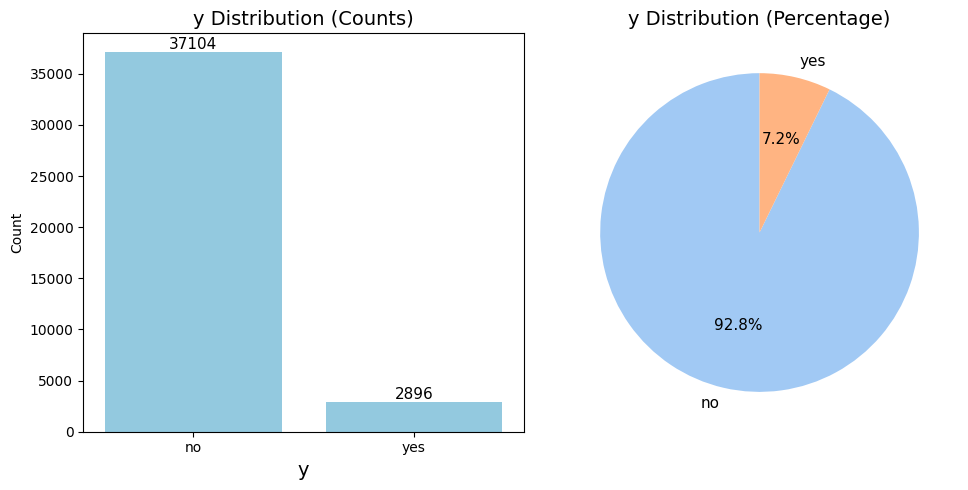

In [39]:
# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# --- Left: Countplot (Histogram) ---
ax1 = sns.countplot(data=df, x='y', color='skyblue', ax=axes[0])

# Annotate counts on bars
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}',  
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom',
                 fontsize=11)
    
# Customize countplot
ax1.set_title("y Distribution (Counts)", fontsize=14)
ax1.set_xlabel("y", fontsize=14)
ax1.set_ylabel("Count", fontsize=10)

# --- Right: Pie Chart with % ---
y_counts = df['y'].value_counts()
axes[1].pie(y_counts, 
            labels=y_counts.index,
            autopct='%1.1f%%', 
            startangle=90, 
            colors=sns.color_palette("pastel")[0:len(y_counts)],
            textprops={'fontsize': 11})

axes[1].set_title("y Distribution (Percentage)", fontsize=14)

# Adjust layout and show
plt.tight_layout()
plt.show()

Result above shows that y is an imbalanced data with no = 92.8% and yes = 7.2%; implies that customer who never going to be subscribe were called

### Drop features related to campaign(calls) for pre-campaign model development.

Codes below drop call related clumns.

In [41]:
df = df.drop(columns=['day', 'duration', 'campaign', 'month', 'contact'])
df.head()

,age,job,marital,education,default,balance,housing,loan,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,no
1,44.0,technician,single,secondary,no,29.0,yes,no,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,no
4,33.0,unknown,single,unknown,no,1.0,no,no,no


In [382]:
# Save the pre campaign model dataset
output_path = r"C:\Users\USER\Documents\Customer Intention\df_pre_camp.csv"
df.to_csv(output_path, index=False)
print(f"pre_camp dataset saved to: {output_path}")

pre_camp dataset saved to: C:\Users\USER\Documents\Customer Intention\df_pre_camp.csv


### Feature Engineering

**Engineer:**
  * age
  * balance

### Feature Engineer age column

Codes below examine age column for missing values.

In [120]:
df["age"].isna().sum()

np.int64(0)

From the result above, age column has no missing value

Codes below examine age column for statastics

In [122]:
# Summary statistics for 'age' (rounded to 4 decimal places)
age_stats = df['age'].describe().round(4)

print("Statistics for 'age' column:")
print(age_stats)

Statistics for 'age' column:
count    40000.0000
mean        40.5446
std          9.6418
min         19.0000
25%         33.0000
50%         39.0000
75%         48.0000
max         95.0000
Name: age, dtype: float64


From the results above, age column has 40,000 data points which ranges from 19 to 95 where 25% is 33, 50% is 39 and 75% is 48. , it has 79 outlier and has mean and standard deviation values of 40.5 and 9.6 respectively.

Codes below creates age_ group clumn with datapoints;Young(19-40), Middle(41-65) and Old(66-95) from age column.

In [384]:
# Bin the 'age' column into 'Young', 'Middle', 'Old'
bins = [18, 40, 65, 95]  # 19-40: Young, 41-65: Middle, 66-95: Old
labels = ['Young', 'Middle', 'Old']

# Create 'age_group' column in place
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# Check the first few rows
print(df[['age', 'age_group']].head(10))

    age age_group
0  58.0    Middle
1  44.0    Middle
2  33.0     Young
3  47.0    Middle
4  33.0     Young
5  35.0     Young
6  28.0     Young
7  42.0    Middle
8  58.0    Middle
9  43.0    Middle


From the result above, age_gruop column has been created from age column.

### Feature Engineer balance column.

Codes below examine balance column for missing values.

In [126]:
df["balance"].isna().sum()

np.int64(0)

From result above, balance column has no missing values.

codes below examine balance column's statistics.

In [128]:
# Summary statistics for 'age' (rounded to 4 decimal places)
balance_stats = df['balance'].describe().round(4)

print("Statistics for 'balance' column:")
print(balance_stats)

Statistics for 'balance' column:
count     40000.0000
mean       1274.2776
std        2903.7697
min       -8019.0000
25%          54.0000
50%         407.0000
75%        1319.0000
max      102127.0000
Name: balance, dtype: float64


From the results above, balance column has 40,000 data points which ranges from 102127 to -8019 Euros where 25% is 54, 50% is 407 and 75% is 1319. , it and has mean and standard deviation values of 1274.3 and 2903.77 respectively.

Codes below create balance_group column with data points: low(balance less than median value; 407 Euros) and high(balance more than median value;407 Euros) from the balance column using median based binning method.

In [386]:
median_balance = df['balance'].median()

df['balance_group'] = pd.cut(df['balance'],
                             bins=[-float('inf'), median_balance, float('inf')],
                             labels=['Low', 'High'])
# Check the first few rows
print(df[['balance', 'balance_group']].head(10))

   balance balance_group
0   2143.0          High
1     29.0           Low
2      2.0           Low
3   1506.0          High
4      1.0           Low
5    231.0           Low
6    447.0          High
7      2.0           Low
8    121.0           Low
9    593.0          High


From the result above, balance_group column has been created from the balance column.

In [388]:
df.head()

,age,job,marital,education,default,balance,housing,loan,y,age_group,balance_group
0,58.0,management,married,tertiary,no,2143.0,yes,no,no,Middle,High
1,44.0,technician,single,secondary,no,29.0,yes,no,no,Middle,Low
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,no,Young,Low
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,no,Middle,High
4,33.0,unknown,single,unknown,no,1.0,no,no,no,Young,Low


Result above shows the dataset after feature engineering age and balance columns.

Codes below examine target variable unique values

In [390]:
unique_values = df['y'].unique()
print( f"Distinct values are:")
print(unique_values)

Distinct values are:
['no' 'yes']


Result above shown that y is a binary data as expected

Codes below examine target variable; y for missing values.

In [134]:
df["y"].isna().sum()

np.int64(0)

Result above shown that y has no missing value.

### Examine linear relationship among the variables.

Codes below use cramer's V correaltion to examine relationship among the categorical variable and the target variable; y.

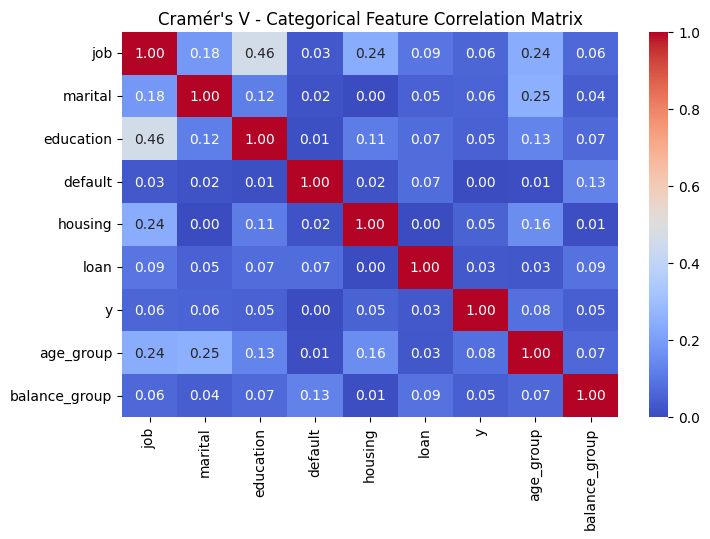

In [392]:
# Cramér's V Correlation Heatma

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define Cramér's V function
def cramers_v(x, y):
    """
    Compute Cramér's V statistic for categorical-categorical association.
    Returns a value between 0 (no association) and 1 (perfect association).
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Bias correction
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Step 2: Select categorical columns

cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Step 3: Compute Cramér's V matrix

n = len(cat_cols)
cramer_matrix = pd.DataFrame(np.zeros((n, n)), index=cat_cols, columns=cat_cols)

for i in range(n):
    for j in range(n):
        if i == j:
            cramer_matrix.iloc[i, j] = 1.0
        elif i < j:
            v = cramers_v(df[cat_cols[i]], df[cat_cols[j]])
            cramer_matrix.iloc[i, j] = v
            cramer_matrix.iloc[j, i] = v  # symmetric


# Step 4: Plot heatmap

plt.figure(figsize=(8, 5))
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramér's V - Categorical Feature Correlation Matrix")
plt.show()

Results above shown that none of the categorical variables are strongly related to each other. 
Also, their relationship with the target variable is very low(0.03 to 0.08); indicating that no single categorical variable strongly predicts subscription by itself. Thus ensemble models are needed.

### Convert y to numeric to view its relationship with the numerical variables.

Codes be convert y to numeric.

In [394]:
# Convert 'y' column: 'no' → 0, 'yes' → 1
df['y'] = df['y'].map({'no': 0, 'yes': 1})

unique_values = df['y'].unique()
print( f"Distinct values are:")
print(unique_values)

Distinct values are:
[0 1]


Codes below use pearson correaltion to examine relationship among the numerical variables and the target variable; y.

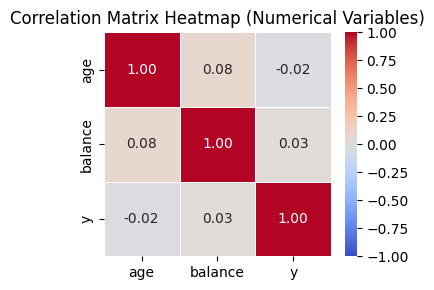

In [396]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
df_num = df[numerical_cols]

# Calculate the correlation matrix
corr_matrix = df_num.corr()

# Set up the figure size and heatmap styling
plt.figure(figsize=(len(numerical_cols) * 1.2, len(numerical_cols)))  # scale with number of variables
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)

# Add titles
plt.title("Correlation Matrix Heatmap (Numerical Variables)")
plt.tight_layout()
plt.show()

Result above shown that none of the numerical variables are strongly related to each other.
Also their relationship with the target variable is very low(-0.02 to 0.03), indicating that no single numerical variable strongly predicts subscription by itself.Thus ensemble models are needed.

Codes below use mixed type correlation to examine relationship among the numerical and the categorical variables.

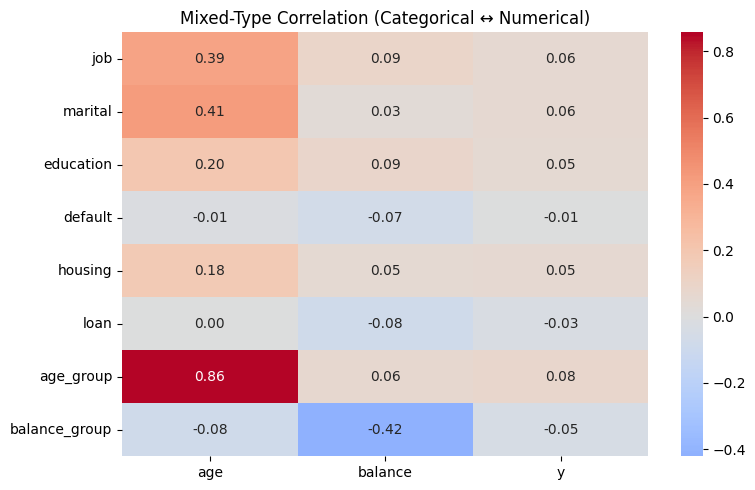

In [398]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation ratio (eta) for categorical → numerical
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    n_categories = np.max(fcat) + 1
    y_avg = np.zeros(n_categories)
    n = np.zeros(n_categories)
    for i in range(n_categories):
        values = measurements[fcat == i]
        n[i] = len(values)
        y_avg[i] = np.mean(values) if len(values) > 0 else 0
    y_total = np.mean(measurements)
    numerator = np.sum(n * (y_avg - y_total) ** 2)
    denominator = np.sum((measurements - y_total) ** 2)
    return np.sqrt(numerator / denominator) if denominator != 0 else 0

# Separate columns
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Compute mixed correlations
corr_matrix = pd.DataFrame(index=cat_cols, columns=num_cols, dtype=float)

for cat in cat_cols:
    for num in num_cols:
        cat_series = df[cat]
        num_series = df[num]
        if len(set(cat_series.dropna())) == 2:  # binary → point-biserial
            cat_bin = pd.factorize(cat_series)[0]
            corr, _ = pointbiserialr(cat_bin, num_series)
        else:
            corr = correlation_ratio(cat_series, num_series)
        corr_matrix.loc[cat, num] = corr

# Plot heatmap

plt.figure(figsize=(8, 5))  # width=8, height=5
sns.heatmap(corr_matrix.astype(float), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Mixed-Type Correlation (Categorical ↔ Numerical)")
plt.tight_layout()
plt.show()

Result above shown that age_gruop and age variables are strongly(0.86) related to each other. so, one of them will be dropped.
Since age contribution to predicting y is very low(-0.02) compare to that of age_group(0.08), age column will be dropped.

Codes below drop age column.

In [400]:
df.drop(columns=['age'], inplace=True)
df.head()

,job,marital,education,default,balance,housing,loan,y,age_group,balance_group
0,management,married,tertiary,no,2143.0,yes,no,0,Middle,High
1,technician,single,secondary,no,29.0,yes,no,0,Middle,Low
2,entrepreneur,married,secondary,no,2.0,yes,yes,0,Young,Low
3,blue-collar,married,unknown,no,1506.0,yes,no,0,Middle,High
4,unknown,single,unknown,no,1.0,no,no,0,Young,Low


In [ ]:
Result above shown the age column has been dropped.

### Column by column analysis.

### balance column analysis
Codes below examines age column for the following:
* statistics
* presence of outliers
* skewness and kurtosis.
* its distribution using box plot and histogram.

Statistics for 'balance' column:
count     40000.0000
mean       1274.2776
std        2903.7697
min       -8019.0000
25%          54.0000
50%         407.0000
75%        1319.0000
max      102127.0000
Name: balance, dtype: float64

Skewness of 'balance': 8.2592
Kurtosis of 'balance': 141.8332

Number of Outliers: 4280
Percentage of Outliers: 10.70%


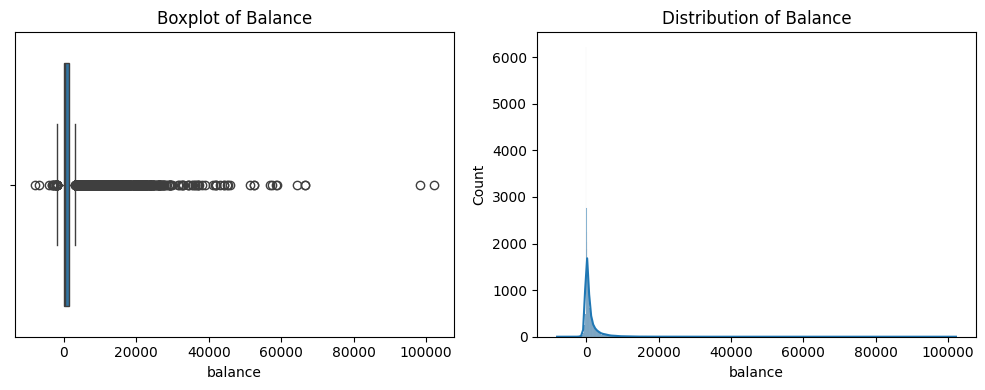

In [146]:
# Summary statistics for 'balance' (rounded to 4 decimal places)
balance_stats = df['balance'].describe().round(4)
skewness = round(df['balance'].skew(), 4)
kurtosis = round(df['balance'].kurtosis(), 4)

print("Statistics for 'balance' column:")
print(balance_stats)
print(f"\nSkewness of 'balance': {skewness}")
print(f"Kurtosis of 'balance': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'balance'
outliers = df[(df['balance'] < lower_bound) | (df['balance'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'balance' column
sns.boxplot(x=df['balance'], ax=axes[0])
axes[0].set_title("Boxplot of Balance")

# Histogram for 'balance' column
sns.histplot(df['balance'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Balance")

plt.tight_layout()
plt.show()

From the results above, balance column has 40,000 data points which ranges from -8019 to 102,127 Euros where 25% is 54, 50% is 407 and 75% is 1,319. It is heavely skewed to the right with skeweness value of 8.3, it has 79 outlier and has mean and standard deviation values of 1274.3 and 21903.8 respectively.

codes below transform balance column using yeo-johnson method.

In [402]:
# Initialize Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Fit and transform only X1 column
df['balance'] = pt.fit_transform(df[['balance']]) 

Codes below examines balance column again after transformation

Statistics for 'balance' column:
count    40000.0000
mean       357.5516
std        872.1375
min     -28701.9087
25%         33.4751
50%        186.0995
75%        502.0455
max      19570.3913
Name: balance, dtype: float64

Skewness of 'balance': 1.0586
Kurtosis of 'balance': 82.983

Number of Outliers: 4932
Percentage of Outliers: 12.33%


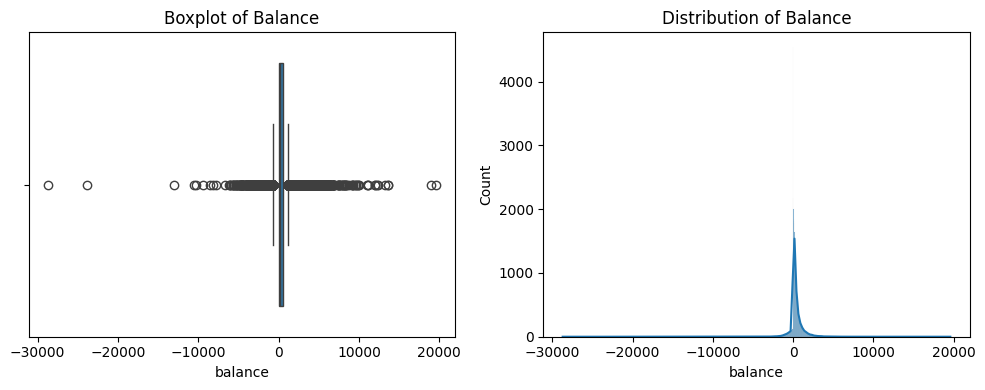

In [150]:
# Summary statistics for 'balance' (rounded to 4 decimal places)
balance_stats = df['balance'].describe().round(4)
skewness = round(df['balance'].skew(), 4)
kurtosis = round(df['balance'].kurtosis(), 4)

print("Statistics for 'balance' column:")
print(balance_stats)
print(f"\nSkewness of 'balance': {skewness}")
print(f"Kurtosis of 'balance': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'balance'
outliers = df[(df['balance'] < lower_bound) | (df['balance'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'balance' column
sns.boxplot(x=df['balance'], ax=axes[0])
axes[0].set_title("Boxplot of Balance")

# Histogram for 'balance' column
sns.histplot(df['balance'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Balance")

plt.tight_layout()
plt.show()

From the result above, its skeweness has reduced from 8.3 to 1.1 after transformation.

Codes below handle outliers in age column using winsorization methods.

In [404]:
from scipy.stats.mstats import winsorize
df['balance'] = winsorize(df['balance'], limits=[0.10, 0.10]).data

codes below examine balance column again after winsorization.

Statistics for 'balance' column:
count    40000.0000
mean       328.9595
std        363.7384
min          0.0000
25%         33.4751
50%        186.0995
75%        502.0455
max       1109.3281
Name: balance, dtype: float64

Skewness of 'balance': 1.0889
Kurtosis of 'balance': -0.1171

Number of Outliers: 0
Percentage of Outliers: 0.00%


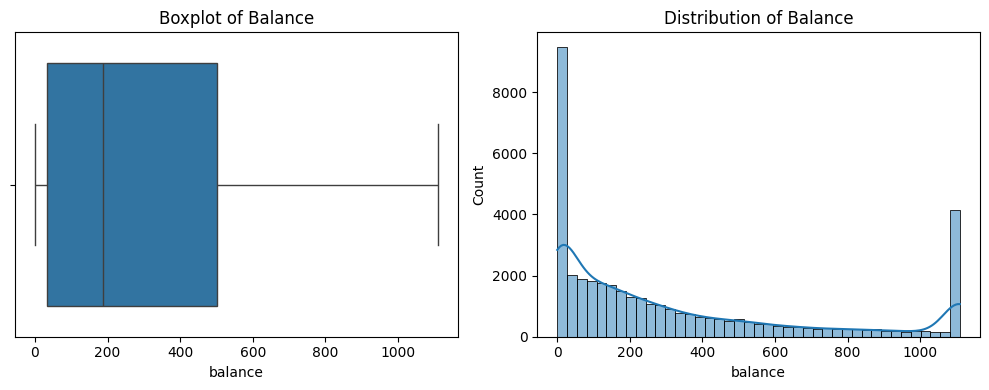

In [154]:
# Summary statistics for 'balance' (rounded to 4 decimal places)
balance_stats = df['balance'].describe().round(4)
skewness = round(df['balance'].skew(), 4)
kurtosis = round(df['balance'].kurtosis(), 4)

print("Statistics for 'balance' column:")
print(balance_stats)
print(f"\nSkewness of 'balance': {skewness}")
print(f"Kurtosis of 'balance': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'balance'
outliers = df[(df['balance'] < lower_bound) | (df['balance'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'balance' column
sns.boxplot(x=df['balance'], ax=axes[0])
axes[0].set_title("Boxplot of Balance")

# Histogram for 'balance' column
sns.histplot(df['balance'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Balance")

plt.tight_layout()
plt.show()

From result above, its outliers have reduced from 4280 to 0(no more outliers)

Codes below standardize balance column using z-score.

In [406]:
scaler = StandardScaler()

# Standardize balance in place
df['balance'] = scaler.fit_transform(df[['balance']])

Code below examine balance column stats after standardization

In [158]:
# Summary statistics for 'balance' (rounded to 4 decimal places)
balance_stats = df['balance'].describe().round(4)

print("Statistics for 'balance' column:")
print(balance_stats)

Statistics for 'balance' column:
count    40000.0000
mean         0.0000
std          1.0000
min         -0.9044
25%         -0.8124
50%         -0.3928
75%          0.4759
max          2.1454
Name: balance, dtype: float64


From the result above, balance has been standardized, its mean and standarded deviation values are now 0 and 1 respectively as expected.

### Categorical column analysis.

### job column analysis.

Codes below examine job column for missing values

In [160]:
df["job"].isna().sum()

np.int64(0)

Result above show that job column has no missing value.

Codes below examine job column distinct values

In [162]:
unique_values = df['job'].unique()
print( f"Distinct values are:")
print(unique_values)

Distinct values are:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


Codes below one hot encode job column and drop its first dummies.

In [408]:
# Ensure only one-hot encoding of the 'job' column
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
job_encoded = ohe.fit_transform(df[['job']])

# Create a DataFrame with safe column names
job_encoded_df = pd.DataFrame(job_encoded, 
                              columns=[f"job_{c.replace('-', '_')}" for c in ohe.categories_[0][1:]], 
                              index=df.index)

# Drop 'job' if it exists and concatenate safely
df = pd.concat([df.drop(columns=['job'], errors='ignore'), job_encoded_df], axis=1)

# Define the list of job dummy columns
job_columns = [col for col in df.columns if col.startswith('job_')]

# Display first few rows of all job dummy columns
df[job_columns].head()

,job_blue_collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self_employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Result above show that job column has been one hot encoded and its first dummies dropped.

### marital column analysis

Codes below examine marital column for missing values.

In [166]:
df["marital"].isna().sum()

np.int64(0)

Result above show that marital column has no missing values.

Codes below examamine its distinct values

In [168]:
df["marital"].isna().sum()

np.int64(0)

Result above show that marital column has no missing values.

Codes below examamine its distinct values

In [170]:
unique_values = df['marital'].unique()
print( f"Distinct values are:")
print(unique_values)

Distinct values are:
['married' 'single' 'divorced']


codes below one hot encode marital and drop its first dummies.

In [410]:
# Ensure only one-hot encoding of the 'marital' column
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
marital_encoded = ohe.fit_transform(df[['marital']])

# Create a DataFrame with safe column names
marital_encoded_df = pd.DataFrame(marital_encoded, 
                                  columns=[f"marital_{c.replace('-', '_')}" for c in ohe.categories_[0][1:]], 
                                  index=df.index)

# Drop 'marital' if it exists and concatenate safely
df = pd.concat([df.drop(columns=['marital'], errors='ignore'), marital_encoded_df], axis=1)

# Define the list of marital dummy columns
marital_columns = [col for col in df.columns if col.startswith('marital_')]

# Display first few rows
df[marital_columns].head()

# Display first few rows of all marital dummy columns
df[marital_columns].head()

,marital_married,marital_single
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


Result above show that marital column has been one hot encoded and its first dummies dropped.

### education column analysis

Codes below examines education column for missing values

In [174]:
df["education"].isna().sum()

np.int64(0)

Result above show education column has no missing values.

Codes below examine education column distinct values.

In [176]:
unique_values = df['education'].unique()
print( f"Distinct values are:")
print(unique_values)

Distinct values are:
['tertiary' 'secondary' 'unknown' 'primary']


Codes below one hot encode education column and drop its first dummies.

In [412]:
# Ensure only one-hot encoding of the 'education' column
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
education_encoded = ohe.fit_transform(df[['education']])

# Create a DataFrame with safe column names
education_encoded_df = pd.DataFrame(education_encoded, 
                                  columns=[f"education_{c.replace('-', '_')}" for c in ohe.categories_[0][1:]], 
                                  index=df.index)

# Drop 'education' if it exists and concatenate safely
df = pd.concat([df.drop(columns=['education'], errors='ignore'), education_encoded_df], axis=1)

# Define the list of education dummy columns
education_columns = [col for col in df.columns if col.startswith('education_')]

# Display first few rows of all education dummy columns
df[education_columns].head()

,education_secondary,education_tertiary,education_unknown
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


Resaults above show that education column has been one hot encoded and its first dummies dropped.

### default column analysis.

Codes below examine default column for missing values.

In [180]:
df["default"].isna().sum()

np.int64(0)

Result above show default column has no missing values.

Codes below examine default column distinct values.

In [182]:
unique_values = df['default'].unique()
print( f"Distinct values are:")
print(unique_values)

Distinct values are:
['no' 'yes']


Codes below one hot encode default column and drop the first dummies.

In [414]:
# Ensure only one-hot encoding of the 'default' column
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
default_encoded = ohe.fit_transform(df[['default']])

# Create a DataFrame with safe column names
default_encoded_df = pd.DataFrame(default_encoded, 
                                  columns=[f"default_{c.replace('-', '_')}" for c in ohe.categories_[0][1:]], 
                                  index=df.index)

# Drop 'default' if it exists and concatenate safely
df = pd.concat([df.drop(columns=['default'], errors='ignore'), default_encoded_df], axis=1)

# Define the list of default dummy columns
default_columns = [col for col in df.columns if col.startswith('default_')]

# Display first few rows of all default dummy columns
df[default_columns].head()

,default_yes
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


Resault above shows that default column has been one hot encoded

### housing column analysis.

Codes below examine housing column for missing values.

In [186]:
df["housing"].isna().sum()

np.int64(0)

Result above shows that housing column has no missing values.

Codes below examine housing distinc values.

In [188]:
unique_values = df['housing'].unique()
print( f"Distinct values are:")
print(unique_values)

Distinct values are:
['yes' 'no']


Codes below one hot encode it and drop the first dummies.

In [416]:
# Ensure only one-hot encoding of the 'housing' column
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
housing_encoded = ohe.fit_transform(df[['housing']])

# Create a DataFrame with safe column names
housing_encoded_df = pd.DataFrame(housing_encoded, 
                                  columns=[f"housing_{c.replace('-', '_')}" for c in ohe.categories_[0][1:]], 
                                  index=df.index)

# Drop 'housing' if it exists and concatenate safely
df = pd.concat([df.drop(columns=['housing'], errors='ignore'), housing_encoded_df], axis=1)

# Define the list of housing dummy columns
housing_columns = [col for col in df.columns if col.startswith('housing_')]

# Display first few rows of all housing dummy columns
df[housing_columns].head()

,housing_yes
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0


Results above show that housing has been one hot encoded and its first dummies dropped.

### loan column analysis.

Codes below examines loan for missing values.

In [192]:
df["loan"].isna().sum()

np.int64(0)

Result above show that it has no missing values

Codes below examines its distinct values.

In [194]:
unique_values = df['loan'].unique()
print( f"Distinct values are:")
print(unique_values)

Distinct values are:
['no' 'yes']


Codes below one hot encode it and drop its first dummies.

In [418]:
# Ensure only one-hot encoding of the 'loan' column
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
loan_encoded = ohe.fit_transform(df[['loan']])

# Create a DataFrame with safe column names
loan_encoded_df = pd.DataFrame(loan_encoded, 
                               columns=[f"loan_{c.replace('-', '_')}" for c in ohe.categories_[0][1:]], 
                               index=df.index)

# Drop 'loan' if it exists and concatenate safely
df = pd.concat([df.drop(columns=['loan'], errors='ignore'), loan_encoded_df], axis=1)

# Define the list of loan dummy columns
loan_columns = [col for col in df.columns if col.startswith('loan_')]

# Display first few rows of all loan dummy columns
df[loan_columns].head()

,loan_yes
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


Result above show that it has been one hot encoded and its first dummies dropped.

### age_group column analysis.

Codes below one hot encode age_group and drop its first dummies.

In [420]:
# Ensure only one-hot encoding of the 'age_group' column
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
age_group_encoded = ohe.fit_transform(df[['age_group']])

# Create a DataFrame with safe column names
age_group_encoded_df = pd.DataFrame(age_group_encoded, 
                                    columns=[f"age_group_{c.replace('-', '_')}" for c in ohe.categories_[0][1:]], 
                                    index=df.index)

# Drop 'age_group' if it exists and concatenate safely
df = pd.concat([df.drop(columns=['age_group'], errors='ignore'), age_group_encoded_df], axis=1)

# Define the list of age_group dummy columns
age_group_columns = [col for col in df.columns if col.startswith('age_group_')]

# Display first few rows of all age_group dummy columns
df[age_group_columns].head()

,age_group_Old,age_group_Young
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,1.0


Result above shows it has been one hot encoded and its first dummies dropped.

### balance_group column analysis.

Codes below one hot encode balance_group and drop its first dummies.

In [422]:
# Ensure only one-hot encoding of the 'balance_group' column
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
balance_group_encoded = ohe.fit_transform(df[['balance_group']])

# Create a DataFrame with safe column names
balance_group_encoded_df = pd.DataFrame(balance_group_encoded, 
                                        columns=[f"balance_group_{c.replace('-', '_')}" for c in ohe.categories_[0][1:]], 
                                        index=df.index)

# Drop 'balance_group' if it exists and concatenate safely
df = pd.concat([df.drop(columns=['balance_group'], errors='ignore'), balance_group_encoded_df], axis=1)

# Define the list of balance_group dummy columns
balance_group_columns = [col for col in df.columns if col.startswith('balance_group_')]

# Display first few rows of all balance_group dummy columns
df[balance_group_columns].head()

,balance_group_Low
0,0.0
1,1.0
2,1.0
3,0.0
4,1.0


Result above shows it has been one hot encoded and its first dummies dropped.

In [424]:
df.head()

,balance,y,job_blue_collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self_employed,job_services,job_student,...,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,age_group_Old,age_group_Young,balance_group_Low
0,1.173558,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.850451,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.899427,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,0.639102,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.901809,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


Codes below save the cleaned dataset

In [27]:
# Save thr preprocessed dataset
output_path = r"C:\Users\USER\Documents\Customer Intention\df_ML1.csv"
df.to_csv(output_path, index=False)
print(f"ML1 dataset saved to: {output_path}")

ML1 dataset saved to: C:\Users\USER\Documents\Customer Intention\df_ML1.csv


### Process the dataset for post-model development.

In [202]:
df.head()

,balance,contact,day,month,duration,campaign,y,job_blue_collar,job_entrepreneur,job_housemaid,...,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,age_group_Old,age_group_Young,balance_group_Low
0,1.173558,unknown,5.0,may,261.0,1.0,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.850451,unknown,5.0,may,151.0,1.0,0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.899427,unknown,5.0,may,76.0,1.0,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,0.639102,unknown,5.0,may,92.0,1.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.901809,unknown,5.0,may,198.0,1.0,0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


### Feature engineer day, and campaign columns.

### Feature engineer day column

Codes below examine day column for missing values.

In [205]:
df["day"].isna().sum()

np.int64(0)

Result above shown that day has no missing values.

Codes below examine day column statistics

In [208]:
# Summary statistics for 'day' (rounded to 4 decimal places)
day_stats = df['day'].describe().round(4)

print("Statistics for 'day' column:")
print(day_stats)

Statistics for 'day' column:
count    40000.0000
mean        16.0172
std          8.2781
min          1.0000
25%          8.0000
50%         17.0000
75%         21.0000
max         31.0000
Name: day, dtype: float64


From the results above, day column has 40,000 data points which ranges from 1 to 31 where 25% is 8, 50% is 17 and 75% is 21. , it has mean and standard deviation values of 16.0 and 8.3 respectively.

Codes below create day_group with datapoints: Early(1-10), mid(11-20) and late(21-31) from the day column.

In [344]:
bins = [0, 10, 20, 31]
labels = ['Early', 'Mid', 'Late']
df['day_group'] = pd.cut(df['day'], bins=bins, labels=labels)

# Check the first few rows
print(df[['day', 'day_group']].head(10))

   day day_group
0  5.0     Early
1  5.0     Early
2  5.0     Early
3  5.0     Early
4  5.0     Early
5  5.0     Early
6  5.0     Early
7  5.0     Early
8  5.0     Early
9  5.0     Early


Result above shown that day_group column has been created from the day column.

### Feature engineer campaign column.

In [ ]:
Codes below examine month column for missing values.

In [218]:
df["campaign"].isna().sum()

np.int64(0)

Result above shown that campaign has no missing values

Codes below examine campaign column statistics.

In [346]:
# Summary statistics for 'campaign' (rounded to 4 decimal places)
campaign_stats = df['campaign'].describe().round(4)

print("Statistics for 'campaign' column:")
print(campaign_stats)

Statistics for 'campaign' column:
count    40000.0000
mean         2.8822
std          3.2391
min          1.0000
25%          1.0000
50%          2.0000
75%          3.0000
max         63.0000
Name: campaign, dtype: float64


From the results above, campaign column has 40,000 data points which ranges from 1 to 63 calls where 25% is 1, 50% is 2 and 75% is 3. , it and has mean and standard deviation values of 2.88 and 3.3 respectively.

Codes below create campaign_group column with data points; low(1 call), moderate(2-3 calls) and high(4+ calls) from the campaign column.

In [348]:
bins = [0, 1, 3, float('inf')]
labels = ['Low', 'Moderate', 'High']
df['campaign_group'] = pd.cut(df['campaign'], bins=bins, labels=labels)

# Check the first few rows
print(df[['campaign', 'campaign_group']].head(10))

   campaign campaign_group
0       1.0            Low
1       1.0            Low
2       1.0            Low
3       1.0            Low
4       1.0            Low
5       1.0            Low
6       1.0            Low
7       1.0            Low
8       1.0            Low
9       1.0            Low


Result above shown that campaign_group column has been created from the campaign column.

In [237]:
df.head()

,balance,contact,day,month,duration,campaign,y,job_blue_collar,job_entrepreneur,job_housemaid,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,age_group_Old,age_group_Young,balance_group_Low,day_group,campaign_group
0,1.173558,unknown,5.0,may,261.0,1.0,0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Early,Low
1,-0.850451,unknown,5.0,may,151.0,1.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Early,Low
2,-0.899427,unknown,5.0,may,76.0,1.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,Early,Low
3,0.639102,unknown,5.0,may,92.0,1.0,0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Early,Low
4,-0.901809,unknown,5.0,may,198.0,1.0,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,Early,Low


#### categorical column analysis

#### contact column analysis

Codes below examine contact for missing values.

In [239]:
df["contact"].isna().sum()

np.int64(0)

Result above shown that contact has no missing values.

Codes below examine contact's distinct values

In [243]:
unique_values = df['contact'].unique()
print( f"Distinct values are:")
print(unique_values)

Distinct values are:
['unknown' 'cellular' 'telephone']


Codes below one hot encode contact and drop its first dummies

In [246]:
# Ensure only one-hot encoding of the 'contact' column
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
contact_encoded = ohe.fit_transform(df[['contact']])

# Create a DataFrame with safe column names
contact_encoded_df = pd.DataFrame(contact_encoded, 
                                  columns=[f"contact_{c.replace('-', '_')}" for c in ohe.categories_[0][1:]], 
                                  index=df.index)

# Drop 'contact' if it exists and concatenate safely
df = pd.concat([df.drop(columns=['contact'], errors='ignore'), contact_encoded_df], axis=1)

# Define the list of contact dummy columns
contact_columns = [col for col in df.columns if col.startswith('contact_')]

# Display first few rows of all contact dummy columns
df[contact_columns].head()

,contact_telephone,contact_unknown
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


#### month column analysis

Codes below examine month for missing values

In [249]:
df["month"].isna().sum()

np.int64(0)

Result above shown that month has no missing values.

Codes below examine month's distinct values

In [253]:
unique_values = df['month'].unique()
print( f"Distinct values are:")
print(unique_values)

Distinct values are:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']


Codes below one hot encod month and drop its first dummies.

In [256]:
# Ensure only one-hot encoding of the 'month' column
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
month_encoded = ohe.fit_transform(df[['month']])

# Create a DataFrame with safe column names
month_encoded_df = pd.DataFrame(month_encoded, 
                                columns=[f"month_{c.replace('-', '_')}" for c in ohe.categories_[0][1:]], 
                                index=df.index)

# Drop 'month' if it exists and concatenate safely
df = pd.concat([df.drop(columns=['month'], errors='ignore'), month_encoded_df], axis=1)

# Define the list of month dummy columns
month_columns = [col for col in df.columns if col.startswith('month_')]

# Display first few rows of all month dummy columns
df[month_columns].head()

,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Result above shown that month has been one hot encoded and its first dummies dropped.

#### day-group column analysis.

Codes below one hot encode day_group and drop its first dummies.

In [259]:
# Ensure only one-hot encoding of the 'day_group' column
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
day_group_encoded = ohe.fit_transform(df[['day_group']])

# Create a DataFrame with safe column names
day_group_encoded_df = pd.DataFrame(day_group_encoded, 
                                    columns=[f"day_group_{c.replace('-', '_')}" for c in ohe.categories_[0][1:]], 
                                    index=df.index)

# Drop 'day_group' if it exists and concatenate safely
df = pd.concat([df.drop(columns=['day_group'], errors='ignore'), day_group_encoded_df], axis=1)

# Define the list of day_group dummy columns
day_group_columns = [col for col in df.columns if col.startswith('day_group_')]

# Display first few rows of all day_group dummy columns
df[day_group_columns].head()

,day_group_Late,day_group_Mid
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


Result above shown it has been one hot encoded and its first dummies dropped.

#### Campaign_group column analysis.

In [ ]:
Codes below one hot encode campeign_group and drop its first dummies.

In [261]:
# Ensure only one-hot encoding of the 'campaign_group' column
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
campaign_group_encoded = ohe.fit_transform(df[['campaign_group']])

# Create a DataFrame with safe column names
campaign_group_encoded_df = pd.DataFrame(campaign_group_encoded, 
                                         columns=[f"campaign_group_{c.replace('-', '_')}" for c in ohe.categories_[0][1:]], 
                                         index=df.index)

# Drop 'campaign_group' if it exists and concatenate safely
df = pd.concat([df.drop(columns=['campaign_group'], errors='ignore'), campaign_group_encoded_df], axis=1)

# Define the list of campaign_group dummy columns
campaign_group_columns = [col for col in df.columns if col.startswith('campaign_group_')]

# Display first few rows of all campaign_group dummy columns
df[campaign_group_columns].head()

,campaign_group_Low,campaign_group_Moderate
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


Result above shown campaign_group has been one hot encoded and its first dummies dropped.

#### Numerical columns analysis.

#### day column analysis.

Codes below examine day column for missing values.

In [264]:
df["day"].isna().sum()

np.int64(0)

Result above shown that day column has no missing values.

Codes below examines day column for the following:
statistics
presence of outliers
skewness and kurtosis.
its distribution using box plot and histogram.

Statistics for 'day' column:
count    40000.0000
mean        16.0172
std          8.2781
min          1.0000
25%          8.0000
50%         17.0000
75%         21.0000
max         31.0000
Name: day, dtype: float64

Skewness of 'day': 0.0679
Kurtosis of 'day': -1.0529

Number of Outliers: 0
Percentage of Outliers: 0.00%


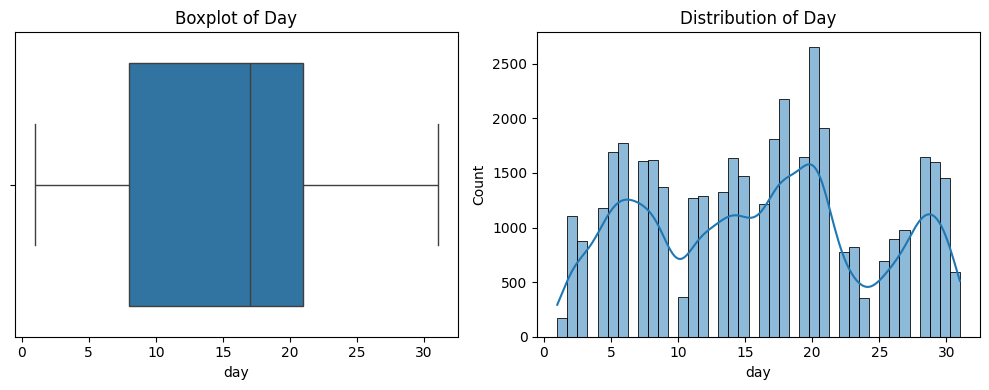

In [269]:
# Summary statistics for 'day' (rounded to 4 decimal places)
day_stats = df['day'].describe().round(4)
skewness = round(df['day'].skew(), 4)
kurtosis = round(df['day'].kurtosis(), 4)

print("Statistics for 'day' column:")
print(day_stats)
print(f"\nSkewness of 'day': {skewness}")
print(f"Kurtosis of 'day': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['day'].quantile(0.25)
Q3 = df['day'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'day'
outliers = df[(df['day'] < lower_bound) | (df['day'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'day' column
sns.boxplot(x=df['day'], ax=axes[0])
axes[0].set_title("Boxplot of Day")

# Histogram for 'day' column
sns.histplot(df['day'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Day")

plt.tight_layout()
plt.show()

 Results above showm that day column has 40,000 data points which ranges from 1 to 31 where 25% is 8, 50% is 17 and 75% is 21. It is normally distributed  with skeweness value of 0.07, it has no outlier and has mean and standard deviation values of 16.0 and 8.3 respectively.

Codes below standardize day column using z-score method and display its stat again.

In [358]:
scaler = StandardScaler()

# Standardize balance in place
df['day'] = scaler.fit_transform(df[['day']])

# Summary statistics for 'day' (rounded to 4 decimal places)
day_stats = df['day'].describe().round(4)
skewness = round(df['day'].skew(), 4)
kurtosis = round(df['day'].kurtosis(), 4)

print("Statistics for 'day' column:")
print(day_stats)

Statistics for 'day' column:
count    40000.0000
mean         0.0000
std          1.0000
min         -1.8141
25%         -0.9685
50%          0.1187
75%          0.6019
max          1.8099
Name: day, dtype: float64


In [ ]:
Result above shown that day column has been standardized, its mean and standard deviation values are now 0 and 1 respectively as expected.

#### Duration column analysis

Codes below examines duration column for missing values.

In [273]:
df["duration"].isna().sum()

np.int64(0)

Result above shown that duration has no missing values

Codes below examines age column for the following:
statistics
presence of outliers
skewness and kurtosis.
its distribution using box plot and histogram.

Statistics for 'duration' column:
count    40000.0000
mean       254.8243
std        259.3665
min          0.0000
25%        100.0000
50%        175.0000
75%        313.0000
max       4918.0000
Name: duration, dtype: float64

Skewness of 'duration': 3.1653
Kurtosis of 'duration': 18.1899

Number of Outliers: 3000
Percentage of Outliers: 7.50%


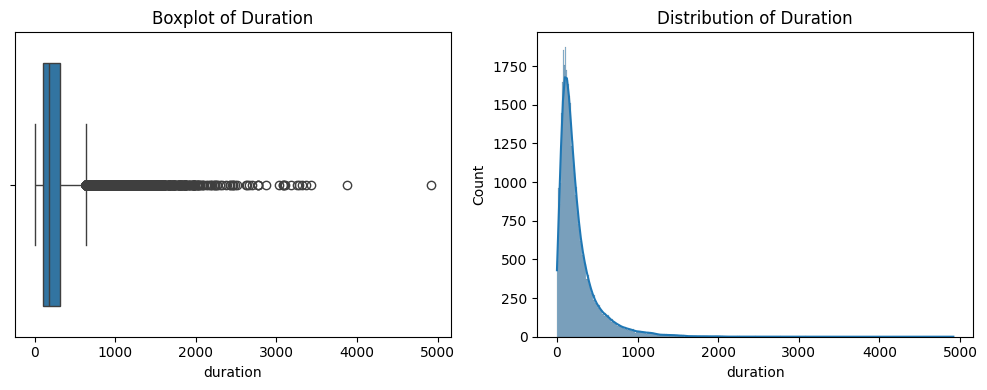

In [275]:
# Summary statistics for 'duration' (rounded to 4 decimal places)
duration_stats = df['duration'].describe().round(4)
skewness = round(df['duration'].skew(), 4)
kurtosis = round(df['duration'].kurtosis(), 4)

print("Statistics for 'duration' column:")
print(duration_stats)
print(f"\nSkewness of 'duration': {skewness}")
print(f"Kurtosis of 'duration': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'duration'
outliers = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'duration' column
sns.boxplot(x=df['duration'], ax=axes[0])
axes[0].set_title("Boxplot of Duration")

# Histogram for 'duration' column
sns.histplot(df['duration'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Duration")

plt.tight_layout()
plt.show()

 Results above shown that duration column has 40,000 data points which ranges from 0 to 4918 seconds where 25% is 100, 50% is 173 and 75% is 313. It is  skewed to the right with skeweness value of 3.17, it has 3,000 outlier and has mean and standard deviation values of 254.8 and 259.4 respectively.

In [ ]:
Codes below transform duration column using yeo-johnson transformation method.

In [360]:
# Initialize Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Fit and transform only duration column
df['duration'] = pt.fit_transform(df[['duration']]) 

codes below examines duration column  again after transformation

Statistics for 'duration' column:
count    40000.0000
mean         7.3271
std          1.7360
min          0.0000
25%          6.2523
50%          7.2707
75%          8.4074
max         15.0361
Name: duration, dtype: float64

Skewness of 'duration': 0.0265
Kurtosis of 'duration': 0.3556

Number of Outliers: 747
Percentage of Outliers: 1.87%


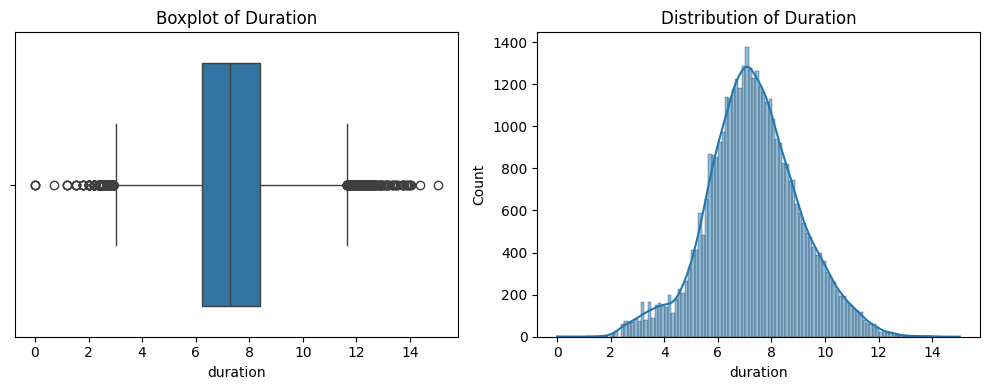

In [282]:
# Summary statistics for 'duration' (rounded to 4 decimal places)
duration_stats = df['duration'].describe().round(4)
skewness = round(df['duration'].skew(), 4)
kurtosis = round(df['duration'].kurtosis(), 4)

print("Statistics for 'duration' column:")
print(duration_stats)
print(f"\nSkewness of 'duration': {skewness}")
print(f"Kurtosis of 'duration': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'duration'
outliers = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'duration' column
sns.boxplot(x=df['duration'], ax=axes[0])
axes[0].set_title("Boxplot of Duration")

# Histogram for 'duration' column
sns.histplot(df['duration'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Duration")

plt.tight_layout()
plt.show()

 Result above shown that its skeweness has reduced from 3.17 to 0.01; it is now normally distributed.

Codes below handle the outliers using winsorization method.

In [362]:
from scipy.stats.mstats import winsorize
df['duration'] = winsorize(df['duration'], limits=[0.02, 0.02]).data

Codes below examine duration column after winsorization.

Statistics for 'duration' column:
count    40000.0000
mean         7.3255
std          1.6780
min          3.4112
25%          6.2523
50%          7.2707
75%          8.4074
max         11.0686
Name: duration, dtype: float64

Skewness of 'duration': 0.0141
Kurtosis of 'duration': -0.1373

Number of Outliers: 0
Percentage of Outliers: 0.00%


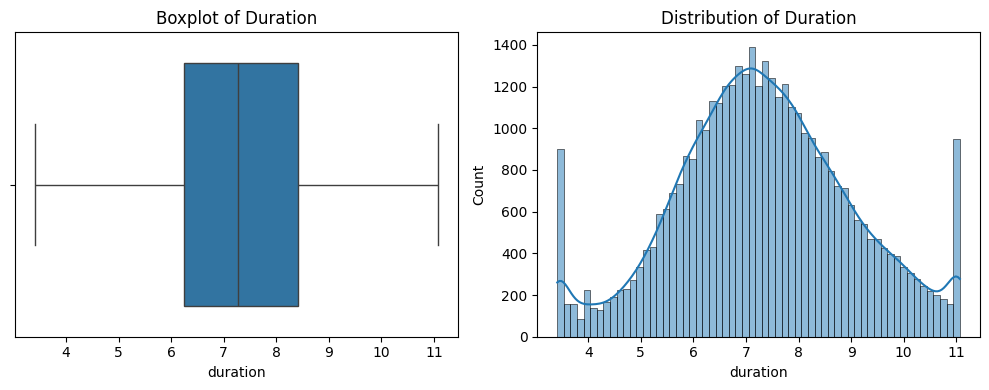

In [286]:
# Summary statistics for 'duration' (rounded to 4 decimal places)
duration_stats = df['duration'].describe().round(4)
skewness = round(df['duration'].skew(), 4)
kurtosis = round(df['duration'].kurtosis(), 4)

print("Statistics for 'duration' column:")
print(duration_stats)
print(f"\nSkewness of 'duration': {skewness}")
print(f"Kurtosis of 'duration': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'duration'
outliers = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'duration' column
sns.boxplot(x=df['duration'], ax=axes[0])
axes[0].set_title("Boxplot of Duration")

# Histogram for 'duration' column
sns.histplot(df['duration'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Duration")

plt.tight_layout()
plt.show()

In [ ]:
Result above shown that its outliers have reduced from 813 to 0(no more outliers) after winsorization.

codes below standardize duration column and display its stats againg.

In [364]:
scaler = StandardScaler()

# Standardize balance in place
df['duration'] = scaler.fit_transform(df[['duration']])

# Summary statistics for 'duration' (rounded to 4 decimal places)
duration_stats = df['duration'].describe().round(4)

print("Statistics for 'duration' column:")
print(duration_stats)

Statistics for 'duration' column:
count    40000.0000
mean         0.0000
std          1.0000
min         -2.3416
25%         -0.6383
50%         -0.0309
75%          0.6457
max          2.2243
Name: duration, dtype: float64


Result above, duration column has been standardized, its mean and standard deviation values are now -0 and 1 respectively as expected.

#### campaign column analysis

Codes below examine campaign for missing values.

In [295]:
df["campaign"].isna().sum()

np.int64(0)

Result above shown that campaign has no missing values.

Codes below examines campaign column for the following:
statistics
presence of outliers
skewness and kurtosis.
its distribution using box plot and histogram.

Statistics for 'campaign' column:
count    40000.0000
mean         2.8822
std          3.2391
min          1.0000
25%          1.0000
50%          2.0000
75%          3.0000
max         63.0000
Name: campaign, dtype: float64

Skewness of 'campaign': 4.7309
Kurtosis of 'campaign': 36.2235

Number of Outliers: 2992
Percentage of Outliers: 7.48%


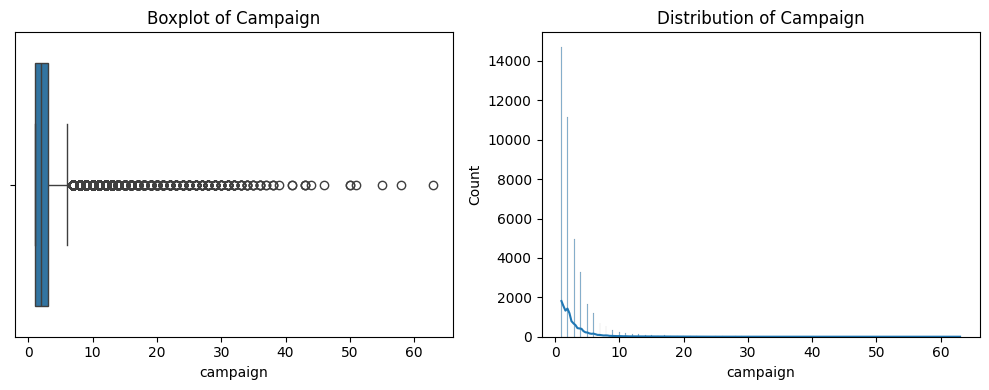

In [297]:
# Summary statistics for 'campaign' (rounded to 4 decimal places)
campaign_stats = df['campaign'].describe().round(4)
skewness = round(df['campaign'].skew(), 4)
kurtosis = round(df['campaign'].kurtosis(), 4)

print("Statistics for 'campaign' column:")
print(campaign_stats)
print(f"\nSkewness of 'campaign': {skewness}")
print(f"Kurtosis of 'campaign': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'campaign'
outliers = df[(df['campaign'] < lower_bound) | (df['campaign'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'campaign' column
sns.boxplot(x=df['campaign'], ax=axes[0])
axes[0].set_title("Boxplot of Campaign")

# Histogram for 'campaign' column
sns.histplot(df['campaign'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Campaign")

plt.tight_layout()
plt.show()

Results above shown that campain column has 40,000 data points which ranges from 1to 63 calls where 25% is 1, 50% is 2 and 75% is 3. It is  skewed to the right with skeweness value of 4.73, it has 2,992 outlier and has mean and standard deviation values of 2.88 and 3.24 respectively.

 Codes below transform campaign column using yeo-johnson transformation method.

In [366]:
# Initialize Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Fit and transform only duration column
df['campaign'] = pt.fit_transform(df[['campaign']]) 

Codes below examines it againe after tranformation.

Statistics for 'campaign' column:
count    40000.0000
mean         0.6515
std          0.1353
min          0.4972
25%          0.4972
50%          0.6611
75%          0.7426
max          0.9676
Name: campaign, dtype: float64

Skewness of 'campaign': 0.213
Kurtosis of 'campaign': -1.1696

Number of Outliers: 0
Percentage of Outliers: 0.00%


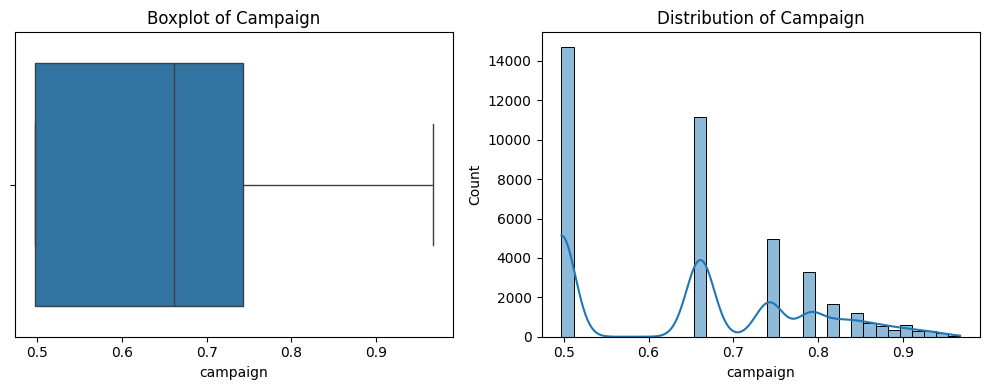

In [302]:
# Summary statistics for 'campaign' (rounded to 4 decimal places)
campaign_stats = df['campaign'].describe().round(4)
skewness = round(df['campaign'].skew(), 4)
kurtosis = round(df['campaign'].kurtosis(), 4)

print("Statistics for 'campaign' column:")
print(campaign_stats)
print(f"\nSkewness of 'campaign': {skewness}")
print(f"Kurtosis of 'campaign': {kurtosis}")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'campaign'
outliers = df[(df['campaign'] < lower_bound) | (df['campaign'] > upper_bound)]

# Calculate the number and percentage of outliers
number_outliers = len(outliers)
percentage_outliers = (len(outliers) / len(df)) * 100

# Print number and percentage of outliers
print(f"\nNumber of Outliers: {number_outliers}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for 'campaign' column
sns.boxplot(x=df['campaign'], ax=axes[0])
axes[0].set_title("Boxplot of Campaign")

# Histogram for 'campaign' column
sns.histplot(df['campaign'], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Campaign")

plt.tight_layout()
plt.show()

 Result above shown that it has become normally distributed with skeness value of 0.21 and its outliers have also reduced from 2992 t0 0 after yeo-johnson

 Codes below standardize campain column using z-score and display its stats again.

In [368]:
scaler = StandardScaler()

# Standardize balance in place
df['campaign'] = scaler.fit_transform(df[['campaign']])

# Summary statistics for 'campaign' (rounded to 4 decimal places)
campaign_stats = df['campaign'].describe().round(4)

print("Statistics for 'campaign' column:")
print(campaign_stats)

Statistics for 'campaign' column:
count    40000.0000
mean         0.0000
std          1.0000
min         -1.1405
25%         -1.1405
50%          0.0710
75%          0.6727
max          2.3353
Name: campaign, dtype: float64


Result above shown that campaign column has been standardized, its mean and standard deviation values are now 0 and 1 respectively as expected.

In [370]:
df.head()

,age,balance,day,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,day_group_Early,day_group_Late,day_group_Mid,campaign_group_High,campaign_group_Low,campaign_group_Moderate
0,58.0,1.173558,-1.3309,0.429153,-1.140505,no,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,44.0,-0.850451,-1.3309,-0.195075,-1.140505,no,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,33.0,-0.899427,-1.3309,-0.921066,-1.140505,no,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,47.0,0.639102,-1.3309,-0.725270,-1.140505,no,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,33.0,-0.901809,-1.3309,0.108862,-1.140505,no,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [310]:
# Save thr preprocessed dataset for post campaign model development
output_path = r"C:\Users\USER\Documents\Customer Intention\df_post_camp.csv"
df.to_csv(output_path, index=False)
print(f"post_camp dataset saved to: {output_path}")

post_camp dataset saved to: C:\Users\USER\Documents\Customer Intention\df_post_camp.csv


Having understood transformation suitable for each variable, next step is to create preprocessing pipeline for both pre_campaign and post_campaign models to automate the preprocessing steps.